Time-of-day distribution:
 Evening       1497
Afternoon     1054
Morning        372
Late Night     143
Name: TimeOfDay, dtype: int64

Content category distribution:
 Other        2377
TV/Drama      437
Music         162
Education      90
Name: ContentCategory, dtype: int64


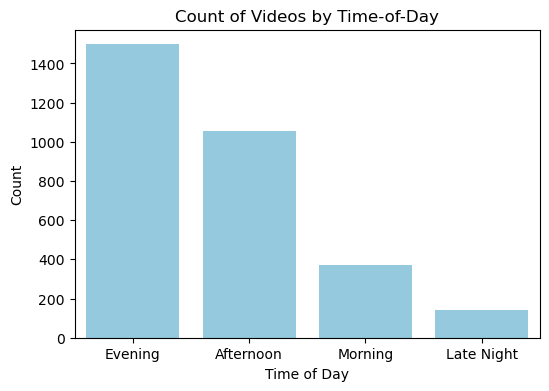

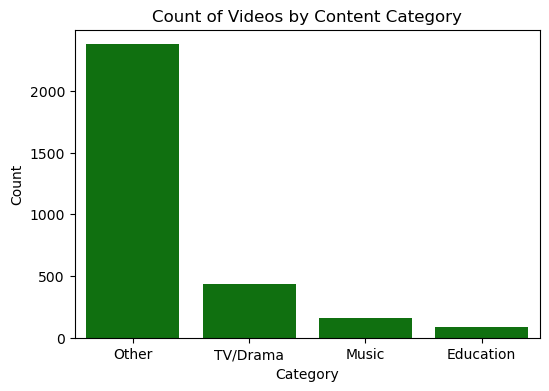

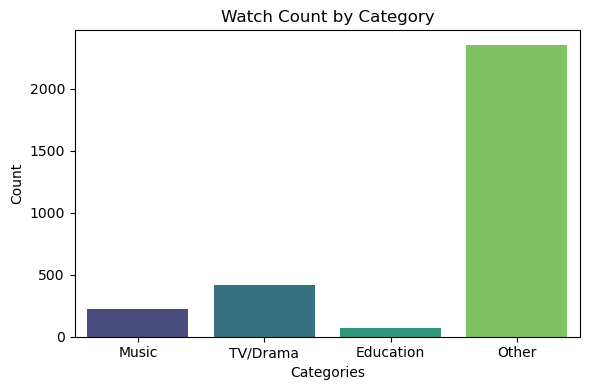

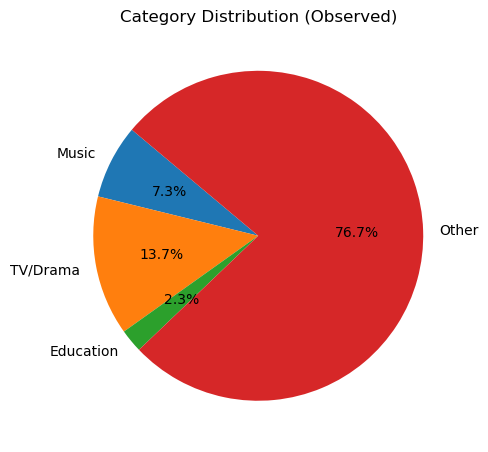

In [11]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare
import numpy as np
from scipy.stats import chi2_contingency

with open("youtube_history.json", "r", encoding="utf-8") as f:
    data = json.load(f)

category_keywords = {
    "Music": [
        "music", "lyrics", "song", "album", "karaoke", "dance", 
        "cant remember forget you", "just dance", "concert", "live"
    ],
    "TV/Drama": [
        "dizi", "fragman", "bölüm", "episode", "drama", "film", 
        "netflix", "kısmetse olur", "medcezir", "fragmanı"
    ],
    "Education": [
        "tutorial", "nasıl yapılır", "lecture", "lesson", "math", 
        "statistics", "python", "programming"
    ],
    "Other": [
    ]
}

def classify_title(title: str) -> str:
  
    t = title.lower()
    for cat, kw_list in category_keywords.items():
        for kw in kw_list:
            if kw.lower() in t:
                return cat
    return "Other"

observed_categories = []
for item in data:
    title_str = item.get("title", "")
    if not title_str:
        observed_categories.append("Other")
    else:
        cat_found = classify_title(title_str)
        observed_categories.append(cat_found)


df = pd.DataFrame({"Category": observed_categories})
observed_counts_series = df["Category"].value_counts()

all_cats = list(category_keywords.keys())  # [Music, TV/Drama, Education, Other]
observed_counts = [observed_counts_series.get(cat, 0) for cat in all_cats]

import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

with open('youtube_history.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

def get_time_of_day(timestamp):
    dt = pd.to_datetime(timestamp)  
    hour = dt.hour
    if 0 <= hour < 6:
        return 'Late Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

def classify_content(title):
    music_keywords = ['music', 'lyrics', 'song', 'karaoke', 'dance']
    drama_keywords = ['dizi', 'fragman', 'bölüm', 'series', 'film', 'episode', 'netflix', 'scene']
    edu_keywords   = ['tutorial', 'how to', 'lecture', 'lesson', 'math', 'statistics', 'python', 'programming']

    title_lower = title.lower()
    if any(kw in title_lower for kw in music_keywords):
        return 'Music'
    elif any(kw in title_lower for kw in drama_keywords):
        return 'TV/Drama'
    elif any(kw in title_lower for kw in edu_keywords):
        return 'Education'
    else:
        return 'Other'

time_of_day_list = []
content_category_list = []

for item in data:
    raw_time = item.get('time', '')
    if raw_time:
        tod = get_time_of_day(raw_time)
    else:
        tod = 'Unknown'
    
    raw_title = item.get('title', '')
    cat = classify_content(raw_title)

    time_of_day_list.append(tod)
    content_category_list.append(cat)

df = pd.DataFrame({
    'TimeOfDay': time_of_day_list,
    'ContentCategory': content_category_list
})

time_counts = df['TimeOfDay'].value_counts()
cat_counts  = df['ContentCategory'].value_counts()

print("Time-of-day distribution:\n", time_counts)
print("\nContent category distribution:\n", cat_counts)

# I needed to plot the distribution of time-of-day to see when I tend to watch videos most frequently throughout the day. By grouping the data into time periods like Morning, Afternoon, Evening, and Late Night, I can observe peaks and troughs in my viewing habits.
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='TimeOfDay', color='skyblue')
plt.title("Count of Videos by Time-of-Day")
plt.ylabel("Count")
plt.xlabel("Time of Day")
plt.show()

# I needed to plot the distribution of content category to see which type ıf content I watch the most. 
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='ContentCategory', color='green')
plt.title("Count of Videos by Content Category")
plt.ylabel("Count")
plt.xlabel("Category")
plt.show()

# Bar chart for observed counts to see the overall data distribution. 
plt.figure(figsize=(6, 4))
sns.barplot(x=all_cats, y=observed_counts, palette="viridis")
plt.title("Watch Count by Category")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Pie chart of observed distribution to see the relative proportion of each category.
plt.figure(figsize=(5, 5))
plt.pie(observed_counts, labels=all_cats, autopct='%1.1f%%', startangle=140)
plt.title("Category Distribution (Observed)")
plt.tight_layout()
plt.show()

In [9]:
#Then I did the contigency table to visualize the joint distribution of time-of-day and content category.

contingency_table = pd.crosstab(df['TimeOfDay'], df['ContentCategory'])
print("\nContingency table:\n", contingency_table)


#After that, I needed to apply the chi-square test to test my hypothesis. 

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-square test results:")
print("  chi2-statistic =", chi2)
print("  p-value        =", p)
print("  degrees of freedom =", dof)
print("  expected counts:\n", expected)


Contingency table:
 ContentCategory  Education  Music  Other  TV/Drama
TimeOfDay                                         
Afternoon               44     56    792       162
Evening                 19     82   1205       191
Late Night               0     14    123         6
Morning                 27     10    257        78

Chi-square test results:
  chi2-statistic = 90.3003059759177
  p-value        = 1.4171315550624621e-15
  degrees of freedom = 9
  expected counts:
 [[  30.93933464   55.69080235  817.14220483  150.22765819]
 [  43.94324853   79.09784736 1160.59001957  213.36888454]
 [   4.19765166    7.55577299  110.86464449   20.38193085]
 [  10.91976517   19.6555773   288.40313112   53.02152642]]


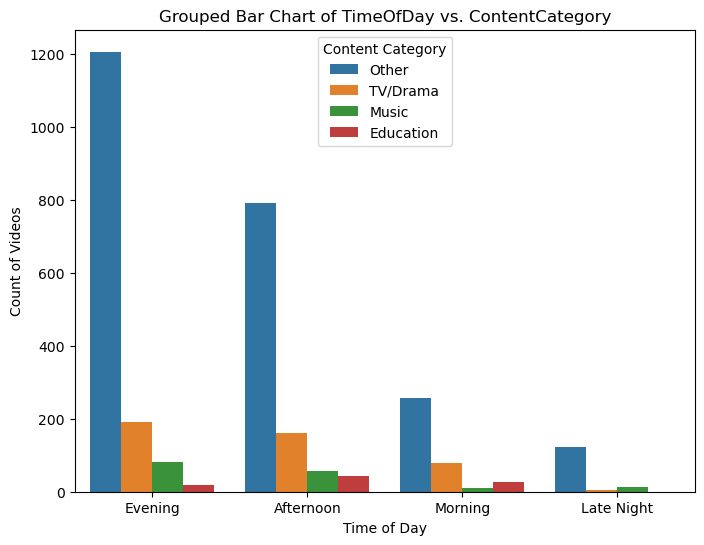

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='TimeOfDay', hue='ContentCategory')
plt.title("Grouped Bar Chart of TimeOfDay vs. ContentCategory")
plt.xlabel("Time of Day")
plt.ylabel("Count of Videos")
plt.legend(title="Content Category")
plt.show()

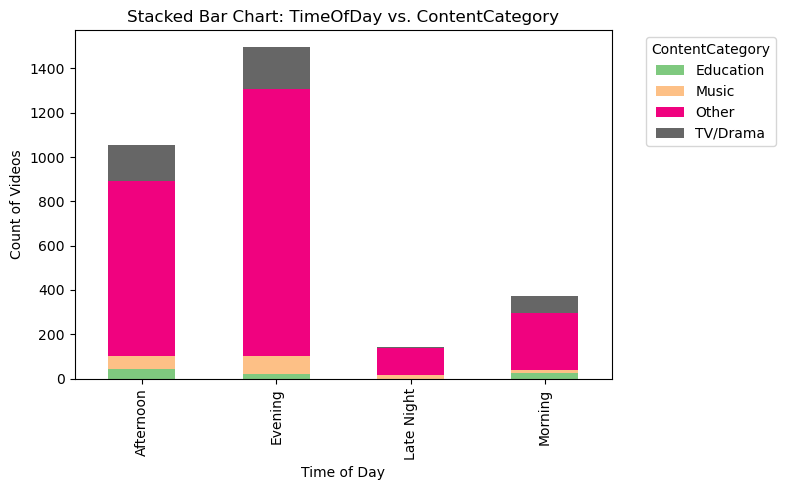

In [6]:
# (b) Stacked bar chart using the contingency table
#    We'll plot each row stacked by columns
contingency_table.plot(
    kind='bar', stacked=True, figsize=(8,5),
    colormap='Accent'  # or any other colormap
)
plt.title("Stacked Bar Chart: TimeOfDay vs. ContentCategory")
plt.xlabel("Time of Day")
plt.ylabel("Count of Videos")
plt.legend(title="ContentCategory", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

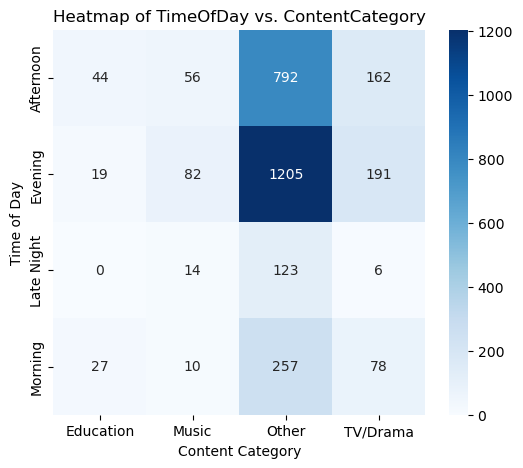

In [7]:
# (c) Heatmap of the contingency table (for a quick glance of distribution)
plt.figure(figsize=(6,5))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title("Heatmap of TimeOfDay vs. ContentCategory")
plt.xlabel("Content Category")
plt.ylabel("Time of Day")
plt.show()
